In [45]:
# Import APIs
import numpy as np
import scipy.io
import mne.io

<ipython-input-84-36e3fcb539ab>:3: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  Normal_data = mne.io.read_raw_cnt(path + 'Normal state.cnt', preload=True, verbose=False)
<ipython-input-84-36e3fcb539ab>:3: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  Normal_data = mne.io.read_raw_cnt(path + 'Normal state.cnt', preload=True, verbose=False)
<ipython-input-84-36e3fcb539ab>:4: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  Drowsiness_data = mne.io.read_raw_cnt(path + 'Fatigue state.cnt', preload=True, verbose=False)
<ipython-input-84-36e3fcb539ab>:4: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  Drowsiness_data = mne.io.read_raw_cnt(path + 'Fatigue state.cnt', preload=True, verbose=False)


(30, 600880)


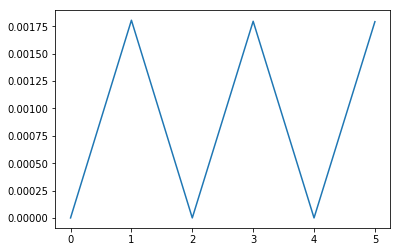

In [84]:
def load_data(subject):
    path = 'YOUR PATH' + subject + "/"
    Normal_data = mne.io.read_raw_cnt(path + 'Normal state.cnt', preload=True, verbose=False)
    Drowsiness_data = mne.io.read_raw_cnt(path + 'Fatigue state.cnt', preload=True, verbose=False)
    
    removed_ch_list = ["HEOL", "HEOR", "VEOU", "VEOL", "A1", "A2", "FT9", "FT10", "PO1", "PO2"]
    
    # Dropping channels
    Normal_data.drop_channels(removed_ch_list)
    Drowsiness_data.drop_channels(removed_ch_list)
        
    tmp1 = Normal_data.get_data()
    tmp2 = Drowsiness_data.get_data()
    
    return tmp1, tmp2

a, b = load_data("1")
print(a.shape)
plt.plot(range(6), a[0, :6])

In [37]:
from mne.filter import filter_data

def preprocessing(normal_eeg, drowsy_eeg, sampling_rate=1000, lowcut=0.15, highcut=45):
    # Cropping 5 min length
    length = 5 * 60 * sampling_rate
    normal_eeg = normal_eeg[:, -length:]
    drowsy_eeg = drowsy_eeg[:, -length:]
    
    # BPF in the range of 0.15~45Hz
    normal_eeg = filter_data(normal_eeg, sfreq=sampling_rate, l_freq=lowcut, h_freq=highcut, verbose=False)
    drowsy_eeg = filter_data(drowsy_eeg, sfreq=sampling_rate, l_freq=lowcut, h_freq=highcut, verbose=False)
    return normal_eeg, drowsy_eeg

In [48]:
def cropping(data, time_window=1000):
    """
    Data shoud have the form of [# of channel, timepoints]
    """
    # For rasing value error.
    if time_window > data.shape[1]:
        print("time_window should be shorter thna the timepoints of the input data.")
        raise ValueError
    #TODO: Raising another value error for the illegal shape.
    
    num_trials = int(data.shape[-1]/time_window)
    
    tmp = np.empty(shape=(num_trials, data.shape[0], time_window))
    for i in range(num_trials):
        tmp[i, :, :] = data[:, i * time_window:(i + 1) * time_window]
    return tmp

In [50]:
def cnt_to_npy(subject):
    path = 'YOUR PATH' + subject + "/"
    tmp1, tmp2 = load_data(subject=subject)
    tmp1, tmp2 = preprocessing(tmp1, tmp2)
    tmp1, tmp2 = cropping(tmp1), cropping(tmp2)
    
    np.save(path + "normal_eeg.npy", tmp1)
    np.save(path + "drowsy_eeg.npy", tmp2)
    return

In [51]:
sbj_list = range(1, 13)

for sbj in sbj_list:
    cnt_to_npy(str(sbj))

<ipython-input-29-e499ddcb6d6c>:3: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  Normal_data = mne.io.read_raw_cnt(path + 'Normal state.cnt', preload=True, verbose=False)
<ipython-input-29-e499ddcb6d6c>:3: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  Normal_data = mne.io.read_raw_cnt(path + 'Normal state.cnt', preload=True, verbose=False)
<ipython-input-29-e499ddcb6d6c>:4: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  Drowsiness_data = mne.io.read_raw_cnt(path + 'Fatigue state.cnt', preload=True, verbose=False)
<ipython-input-29-e499ddcb6d6c>:4: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  Drowsiness_data = mne.io.read_raw_cnt(path + 'Fatigue state.cnt', preload=True, verbose=False)
<ipython-input-29-e499ddcb6d6c>:3: RuntimeWarning: Could not define the number of bytes automatically. Defaulting to 2.
  Normal_data = mne.io.read_raw_cnt(

(30, 300, 1000)
(30, 300000)


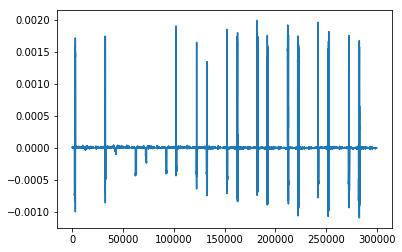

In [73]:
path = 'YOUR PATH'
a = np.load(path + "normal_eeg.npy")
b = np.load(path + "drowsy_eeg.npy")

path = 'YOUR PATH'
c = np.load(path + "normal_eeg.npy")
d = np.load(path + "drowsy_eeg.npy")

tmp = np.swapaxes(a, 0, 1)
print(tmp.shape)
tmp = np.reshape(a, (tmp.shape[0], -1))
print(tmp.shape)
import matplotlib.pyplot as plt
time = range(0, 300000)
plt.plot(time, tmp[6, :])

In [41]:
# print(Normal_data.get_data().shape)
# print(Drowsiness_data.get_data().shape)

# # print(Normal_data.crop(0, 600))
# # print(Drowsiness_data.crop(0, 600))

# print(Normal_data.n_times)
# print(Drowsiness_data.n_times)

# print(Normal_data.to_data_frame)
# print(Drowsiness_data.to_data_frame)

# print(Normal_data.times)
# print(Drowsiness_data.times)

In [42]:
# # Import APIs
# import numpy as np
# import scipy.io
# import mne.io
# import csv
# import mne

# path = 'YOUR PATH'

# Normal_data = mne.io.read_raw_cnt(path + 'Normal state.cnt', eog=(), misc=(), ecg=(), emg=(),
#                     data_format='auto', date_format='mm/dd/yy', preload=False, stim_channel=False, verbose=None)
# Fatigue_data = mne.io.read_raw_cnt(path + 'Fatigue state.cnt', eog=(), misc=(), ecg=(), emg=(),
#                     data_format='auto', date_format='mm/dd/yy', preload=False, stim_channel=False, verbose=None)

# # print(Normal_data.to_data_frame)
# # print(Fatigue_data.to_data_frame)
# # print(Normal_data.times)
# # print(Fatigue_data.times)
# # print("\n")

# a = Normal_data.get_data()
# b = Fatigue_data.get_data()

# def cropping(data, time_window):
#     """
#     Data shoud have the form of [# of channel, timepoints]
#     """
#     # For rasing value error.
#     if time_window > data.shape[1]:
#         print("time_window should be shorter thna the timepoints of the input data.")
#         raise ValueError
#     #TODO: Raising another value error for the illegal shape.
    
#     num_trials = int(data.shape[-1]/time_window)
    
#     tmp = np.empty(shape=(num_trials, data.shape[0], time_window))
#     for i in range(num_trials):
#         tmp[i, :, :] = data[:, i * time_window:(i + 1) * time_window]
#     return tmp
    
# normal_eeg = cropping(a, 600)

# print(normal_eeg.shape)

# np.save("./abc.npy", normal_eeg)

# hello = np.load("./abc.npy")
# print(hello.shape, np.count_nonzero(hello))

# # print(Normal_data.to_data_frame)
# # print(Fatigue_data.to_data_frame)
# # print(Normal_data.times)
# # print(Fatigue_data.times)

# # # Normal_data.annotations.save("Normal_test1.npy")   #modify number
# # # Fatigue_data.annotations.save("Fatigue_test1.npy") #modify number

# # # pr = np.load("Fatigue_test1.npy")

# # f = open("Fatigue_test1.npy")
# # try:
# #     f.write()
# # finally:
# #     f.close()

# # # Normal_data.save(path + 'N.npy')

# # # np.save(path + "test.npy", Normal_data)

# # # N = open(path + 'N.csv', 'r', encoding='UTF-8')
# # # for col in csv.reader(N):
# # #     print(col)
# # # N.close()

# # # nor = np.loadtxt(path + "N.npy", delimiter=',')

# # # test  = np.load(path + "test.npy")
# # # print(test.shape)